In [1]:
#To perform kmeans clustering ; pre-processing the artist and artwork datasets.
#Clustering performed considering the dimensions : height and width as the features for prediction and creation of the clusters.


In [3]:
import numpy as np 
import pandas as pd 
import sqlite3

from sklearn.metrics import accuracy_score

from sklearn import datasets 
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

artists = pd.read_csv('artist_data.csv')
artworks = pd.read_csv('artwork_data.csv')

In [4]:
artists.sample(5)

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
3279,569,"Varley, John",Male,1778–1842,1778.0,1842.0,"Hackney, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/john-varley...
232,32,"Bell, John Zephaniah",Male,1794–1883,1794.0,1883.0,"Dundee, United Kingdom",NaN,http://www.tate.org.uk/art/artists/john-zephan...
3531,2188,"Zyw, Aleksander",Male,1905–1995,1905.0,1995.0,Polska,NaN,http://www.tate.org.uk/art/artists/aleksander-...
1953,15409,"Linke, Simon",Male,born 1958,1958.0,NaN,"Benalla, Australia",NaN,http://www.tate.org.uk/art/artists/simon-linke...
260,2234,"Berthot, Jake",Male,born 1939,1939.0,NaN,"Niagara Falls, United States",NaN,http://www.tate.org.uk/art/artists/jake-bertho...


In [5]:
artworks.sample(2)


,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
48506,6512,P06290,"Hockney, David",artist,1293,Lillies,1970–1,Lithograph on paper,Presented by Curwen Studio through the Institu...,1970,1975.0,support: 752 x 533 mm,752,533,NaN,mm,NaN,© David Hockney,http://www.tate.org.uk/art/images/work/P/P06/P...,http://www.tate.org.uk/art/artworks/hockney-li...
15220,39774,D12406,"Turner, Joseph Mallord William",artist,558,Blank,c.1817,NaN,Accepted by the nation as part of the Turner B...,1817,1856.0,support: 116 x 188 mm,116,188,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-bla...


In [6]:
#counting missing values in each column 
#artists
count_missing_values_artists = artists.isnull().sum()
count_missing_values_artists

id                 0
name               0
gender           116
dates             62
yearOfBirth       60
yearOfDeath     1304
placeOfBirth     492
placeOfDeath    2079
url                0
dtype: int64

In [7]:
#artworks
count_missing_values_artworks = artworks.isnull().sum()
count_missing_values_artworks

id                        0
accession_number          0
artist                    0
artistRole                0
artistId                  0
title                     0
dateText                  0
medium                 6384
creditLine                3
year                   5378
acquisitionYear          45
dimensions             2433
width                  3341
height                 3341
depth                 66687
units                  3341
inscription           62895
thumbnailCopyright    54962
thumbnailUrl          10786
url                       0
dtype: int64

In [8]:
#total percentage of unknown values
#artists
total_cells = np.product(artists.shape) # total cells
total_missing = count_missing_values_artists.sum() 
(total_missing/total_cells) * 100

12.938844847112119

In [9]:
#artworks
total_cells = np.product(artworks.shape) 
total_missing = count_missing_values_artworks.sum() 
(total_missing/total_cells) * 100


15.866533720610972

In [10]:
#ARTISTS

In [11]:
#artists 
artists['name'] = artists['name'].str.upper()
artists['gender'] = artists['gender'].str.upper()
artists['placeOfBirth'] = artists['placeOfBirth'].str.upper()
artists['placeOfDeath'] = artists['placeOfDeath'].str.upper()
artists['dates'] = artists['dates'].str.upper()

#removing white spaces
artists['name'] = artists['name'].str.strip()
artists['gender'] = artists['gender'].str.strip()
artists['placeOfBirth'] = artists['placeOfBirth'].str.strip()
artists['placeOfDeath'] = artists['placeOfDeath'].str.strip()
artists['dates'] = artists['dates'].str.strip()


In [12]:
#check for duplicacy
#artist name
artists[artists.duplicated(subset=['name'], keep=False)]

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
189,25,"BATEMAN, JAMES",MALE,1815–1849,1815.0,1849.0,NaN,NaN,http://www.tate.org.uk/art/artists/james-batem...
190,701,"BATEMAN, JAMES",MALE,1893–1959,1893.0,1959.0,"KENDAL, UNITED KINGDOM","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/james-batem...
901,1028,"DOYLE, JOHN",MALE,BORN 1928,1928.0,NaN,NaN,NaN,http://www.tate.org.uk/art/artists/john-doyle-...
902,160,"DOYLE, JOHN",MALE,1797–1868,1797.0,1868.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/john-doyle-160
1508,273,"HONE, NATHANIEL",MALE,1718–1784,1718.0,1784.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/nathaniel-h...
1509,274,"HONE, NATHANIEL",MALE,1831–1917,1831.0,1917.0,"DUBLIN, ÉIRE","DUBLIN, ÉIRE",http://www.tate.org.uk/art/artists/nathaniel-h...
2496,2211,"PERI, PETER",MALE,1899–1967,1899.0,1967.0,"BUDAPEST, MAGYARORSZÁG","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/peter-peri-...
2497,10544,"PERI, PETER",MALE,BORN 1971,1971.0,NaN,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/peter-peri-...
3060,527,"STOKES, ADRIAN",MALE,1854–1935,1854.0,1935.0,"ENGLAND, UNITED KINGDOM",LONDON,http://www.tate.org.uk/art/artists/adrian-stok...
3061,2002,"STOKES, ADRIAN",MALE,1902–1972,1902.0,1972.0,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/adrian-stok...


In [13]:
#sorting duplicates to get similar names together
artists[artists.duplicated(subset=['name'], keep=False)][0:60].sort_values(by=['name'])

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
189,25,"BATEMAN, JAMES",MALE,1815–1849,1815.0,1849.0,NaN,NaN,http://www.tate.org.uk/art/artists/james-batem...
190,701,"BATEMAN, JAMES",MALE,1893–1959,1893.0,1959.0,"KENDAL, UNITED KINGDOM","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/james-batem...
901,1028,"DOYLE, JOHN",MALE,BORN 1928,1928.0,NaN,NaN,NaN,http://www.tate.org.uk/art/artists/john-doyle-...
902,160,"DOYLE, JOHN",MALE,1797–1868,1797.0,1868.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/john-doyle-160
1508,273,"HONE, NATHANIEL",MALE,1718–1784,1718.0,1784.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/nathaniel-h...
1509,274,"HONE, NATHANIEL",MALE,1831–1917,1831.0,1917.0,"DUBLIN, ÉIRE","DUBLIN, ÉIRE",http://www.tate.org.uk/art/artists/nathaniel-h...
2496,2211,"PERI, PETER",MALE,1899–1967,1899.0,1967.0,"BUDAPEST, MAGYARORSZÁG","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/peter-peri-...
2497,10544,"PERI, PETER",MALE,BORN 1971,1971.0,NaN,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/peter-peri-...
3060,527,"STOKES, ADRIAN",MALE,1854–1935,1854.0,1935.0,"ENGLAND, UNITED KINGDOM",LONDON,http://www.tate.org.uk/art/artists/adrian-stok...
3061,2002,"STOKES, ADRIAN",MALE,1902–1972,1902.0,1972.0,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/adrian-stok...


In [14]:
names = artists['name'].unique()


In [15]:
#checking datatypes
print(artists['yearOfBirth'].head())

0    1930.0
1    1852.0
2    1898.0
3    1760.0
4    1935.0
Name: yearOfBirth, dtype: float64


In [16]:
print(artists['yearOfDeath'].head())

0       NaN
1    1911.0
2    1991.0
3    1803.0
4       NaN
Name: yearOfDeath, dtype: float64


In [17]:
#converting to datetime
artists['yearOfBirth'] = pd.to_datetime(artists['yearOfBirth'], format = "%Y",errors='coerce')
artists['yearOfBirth'].head()

0   1930-01-01
1   1852-01-01
2   1898-01-01
3   1760-01-01
4   1935-01-01
Name: yearOfBirth, dtype: datetime64[ns]

In [18]:
artists['yearOfDeath'] = pd.to_datetime(artists['yearOfDeath'], format = "%Y",errors='coerce')
artists['yearOfDeath'].head()

0          NaT
1   1911-01-01
2   1991-01-01
3   1803-01-01
4          NaT
Name: yearOfDeath, dtype: datetime64[ns]

In [19]:
#ARTWORKS

In [20]:
artworks['artist'] = artworks['artist'].str.upper()
artworks['artistRole'] = artworks['artistRole'].str.upper()
artworks['title'] = artworks['title'].str.upper()
artworks['medium'] = artworks['medium'].str.upper()
artworks['creditLine'] = artworks['creditLine'].str.upper()
artworks['dimensions'] = artworks['dimensions'].str.upper()
artworks['inscription'] = artworks['inscription'].str.upper()
artworks['dateText'] = artworks['dateText'].str.upper()

#removing white spaces
artworks['artist'] = artworks['artist'].str.strip()
artworks['artistRole'] = artworks['artistRole'].str.strip()
artworks['title'] = artworks['title'].str.strip()
artworks['medium'] = artworks['medium'].str.strip()
artworks['creditLine'] = artworks['creditLine'].str.strip()
artworks['dimensions'] = artworks['dimensions'].str.strip()
artworks['inscription'] = artworks['inscription'].str.strip()
artworks['dateText'] = artworks['dateText'].str.strip()

In [21]:
#check for duplicacy
#artist id
artworks[artworks.duplicated(subset=['artistId'], keep=False)] 

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"BLAKE, ROBERT",ARTIST,38,A FIGURE BOWING BEFORE A SEATED OLD MAN WITH H...,DATE NOT KNOWN,"WATERCOLOUR, INK, CHALK AND GRAPHITE ON PAPER....",PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 394 X 419 MM,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"BLAKE, ROBERT",ARTIST,38,"TWO DRAWINGS OF FRIGHTENED FIGURES, PROBABLY F...",DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 311 X 213 MM,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"BLAKE, ROBERT",ARTIST,38,THE PREACHING OF WARNING. VERSO: AN OLD MAN EN...,?C.1785,GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1785,1922.0,SUPPORT: 343 X 467 MM,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"BLAKE, ROBERT",ARTIST,38,SIX DRAWINGS OF FIGURES WITH OUTSTRETCHED ARMS,DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 318 X 394 MM,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"BLAKE, WILLIAM",ARTIST,39,THE CIRCLE OF THE LUSTFUL: FRANCESCA DA RIMINI...,"1826–7, REPRINTED 1892",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1826,1919.0,IMAGE: 243 X 335 MM,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69195,122959,T13864,"P-ORRIDGE, GENESIS",ARTIST,16646,IT’S THAT TIME OF THE MONTH (FROM TAMPAX ROMANA),1975,"WOOD, PERSPEX, CLOCK CASE, TAMPONS AND HUMAN B...",TRANSFERRED FROM TATE ARCHIVE 2012,1975,2013.0,OBJECT: 305 X 305 X 135 MM,305,305,135.0,mm,NaN,© Genesis P-Orridge,http://www.tate.org.uk/art/images/work/T/T13/T...,http://www.tate.org.uk/art/artworks/p-orridge-...
69196,122960,T13865,"P-ORRIDGE, GENESIS",ARTIST,16646,LARVAE (FROM TAMPAX ROMANA),1975,"PERSPEX, WOOD, HAIRPIECE, TAMPON AND HUMAN BLOOD",TRANSFERRED FROM TATE ARCHIVE 2012,1975,2013.0,OBJECT: 305 X 305 X 135 MM,305,305,135.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/p-orridge-...
69197,122961,T13866,"P-ORRIDGE, GENESIS",ARTIST,16646,LIVING WOMB (FROM TAMPAX ROMANA),1976,"WOOD, PERSPEX, PLASTIC, PHOTOGRAPH ON PAPER, T...",TRANSFERRED FROM TATE ARCHIVE 2012,1976,2013.0,OBJECT: 305 X 305 X 135 MM,305,305,135.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/p-orridge-...
69198,121181,T13867,"HATOUM, MONA",ARTIST,2365,PRESENT TENSE,1996,SOAP AND GLASS BEADS,PRESENTED BY TATE MEMBERS 2013,1996,2013.0,DISPLAYED: 45 X 2410 X 2990 MM,45,2410,2990.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/hatoum-pre...


In [22]:
artworks[artworks.duplicated(subset=['artistId'], keep=False)][0:60].sort_values(by=['artistId'])

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"BLAKE, ROBERT",ARTIST,38,A FIGURE BOWING BEFORE A SEATED OLD MAN WITH H...,DATE NOT KNOWN,"WATERCOLOUR, INK, CHALK AND GRAPHITE ON PAPER....",PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 394 X 419 MM,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"BLAKE, ROBERT",ARTIST,38,"TWO DRAWINGS OF FRIGHTENED FIGURES, PROBABLY F...",DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 311 X 213 MM,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"BLAKE, ROBERT",ARTIST,38,THE PREACHING OF WARNING. VERSO: AN OLD MAN EN...,?C.1785,GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1785,1922.0,SUPPORT: 343 X 467 MM,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"BLAKE, ROBERT",ARTIST,38,SIX DRAWINGS OF FIGURES WITH OUTSTRETCHED ARMS,DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 318 X 394 MM,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
28,1063,A00029,"BLAKE, WILLIAM",ARTIST,39,JOB’S SACRIFICE,"1825, REPRINTED 1874",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1825,1919.0,IMAGE: 198 X 150 MM,198,150,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-jobs...
30,1065,A00031,"BLAKE, WILLIAM",ARTIST,39,JOB AND HIS DAUGHTERS,"1825, REPRINTED 1874",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1825,1919.0,IMAGE: 199 X 151 MM,199,151,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-job-...
31,1066,A00032,"BLAKE, WILLIAM",ARTIST,39,JOB AND HIS FAMILY RESTORED TO PROSPERITY,"1825, REPRINTED 1874",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1825,1919.0,IMAGE: 196 X 149 MM,196,149,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-job-...
32,1067,A00033,"BLAKE, WILLIAM",ARTIST,39,SKETCH FOR ‘THE FOUR AND TWENTY ELDERS CASTING...,"C.1803, C.1805–10",GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1803,1922.0,SUPPORT: 488 X 389 MM,488,389,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-sket...
33,1068,A00034,"BLAKE, WILLIAM",ARTIST,39,‘EUROPE’: FRAGMENT OF PAGES 3 AND 4,1794–C.1830–5,RELIEF ETCHING AND WATERCOLOUR ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1794,1922.0,SUPPORT: 92 X 166 MM,92,166,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-euro...
34,1069,A00035,"BLAKE, WILLIAM",ARTIST,39,SONGS OF INNOCENCE AND OF EXPERIENCE: INFANT S...,"1794, REPRINTED 1831 OR LATER",RELIEF ETCHING ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1794,1922.0,IMAGE: 112 X 97 MM,112,97,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-song...


In [23]:
#replacing inconsistent values 
artworks.loc[(artworks.dateText == 'DATE NOT KNOWN'),'dateText']='None'

artworks.loc[(artworks.title == '[TITLE NOT KNOWN] '),'title']='None'

In [24]:
#checking datatypes
print(artworks['year'].head())

0     NaN
1     NaN
2    1785
3     NaN
4    1826
Name: year, dtype: object


In [25]:
print(artworks['acquisitionYear'].head())

0    1922.0
1    1922.0
2    1922.0
3    1922.0
4    1919.0
Name: acquisitionYear, dtype: float64


In [26]:
#converting to datetime
artworks['year'] = pd.to_datetime(artworks['year'], format = "%Y",errors='coerce')
artworks['year'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: year, dtype: datetime64[ns]

In [27]:
artworks['acquisitionYear'] = pd.to_datetime(artworks['acquisitionYear'], format = "%Y",errors='coerce')
artworks['acquisitionYear'].head()

0   1922-01-01
1   1922-01-01
2   1922-01-01
3   1922-01-01
4   1919-01-01
Name: acquisitionYear, dtype: datetime64[ns]

In [28]:
artworks.sample(10)

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
36487,61131,D33963,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,"MOUNTAINOUS VIEW, WITH BUILDINGS ON HILL",C.1830–41,GRAPHITE ON PAPER,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 148 X 225 MM,148,225,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D33/D...,http://www.tate.org.uk/art/artworks/turner-mou...
21614,46189,D18836,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,[BLANK],C.1825,NaN,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 113 X 187 MM,113,187,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-bla...
38054,62704,D35593,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,"CHURCH, ETC.",1845,GRAPHITE ON PAPER,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 86 X 111 MM,86,111,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D35/D...,http://www.tate.org.uk/art/artworks/turner-chu...
48833,16212,P06617,"WILLIAMS, KYFFIN",ARTIST,2148,PONTLYFNI IN SNOW,1974,LITHOGRAPH ON PAPER,PRESENTED BY CURWEN STUDIO THROUGH THE INSTITU...,NaT,1975-01-01,IMAGE: 397 X 733 MM,397,733,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/williams-p...
58739,2471,T03301,"COLLINS, CHARLES",ARTIST,103,LOBSTER ON A DELFT DISH,1738,OIL PAINT ON CANVAS,PURCHASED 1981,NaT,1981-01-01,SUPPORT: 705 X 910 MM,705,910,NaN,mm,DATE INSCRIBED,NaN,http://www.tate.org.uk/art/images/work/T/T03/T...,http://www.tate.org.uk/art/artworks/collins-lo...
22199,46774,D19421,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,BUILDINGS,C.1825,GRAPHITE ON PAPER,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 113 X 189 MM,113,189,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D19/D...,http://www.tate.org.uk/art/artworks/turner-bui...
8425,32965,D05573,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,CLASSICAL LANDSCAPE WITH FIGURES BEFORE AN ARC...,1805,PEN AND INK ON PAPER,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 258 X 150 MM,258,150,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D05/D...,http://www.tate.org.uk/art/artworks/turner-cla...
59678,6292,T04245,"DUNCOMBE, SUSANNA",ARTIST,2284,THREE PILGRIMS CONFRONTED BY CUPID,C.1761,"GRAPHITE, INK AND WATERCOLOUR ON PAPER",PRESENTED BY MRS JOAN HIGHMORE BLACKHALL AND D...,NaT,1986-01-01,SUPPORT: 117 X 103 MM,117,103,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/T/T04/T...,http://www.tate.org.uk/art/artworks/duncombe-t...
33500,58137,D30898,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,DRESDEN: VIEW FROM THE BASIN ON THE UPPER LEVE...,1835,GRAPHITE ON PAPER,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 170 X 104 MM,170,104,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D30/D...,http://www.tate.org.uk/art/artworks/turner-dre...
35310,59951,D32758,"TURNER, JOSEPH MALLORD WILLIAM",ARTIST,558,FOUR SCENES,C.1837–41,GRAPHITE ON PAPER,ACCEPTED BY THE NATION AS PART OF THE TURNER B...,NaT,1856-01-01,SUPPORT: 90 X 113 MM,90,113,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D32/D...,http://www.tate.org.uk/art/artworks/turner-fou...


In [29]:
#clustering of artworks

In [30]:
x = artworks.iloc[:,[12,13]]
x


,width,height
0,394,419
1,311,213
2,343,467
3,318,394
4,243,335
...,...,...
69196,305,305
69197,305,305
69198,45,2410
69199,NaN,NaN


In [32]:
#converting object to float datatype
x['height'] = pd.to_numeric(x['height'],errors = 'coerce')
x['width'] = pd.to_numeric(x['width'],errors = 'coerce')


<ipython-input-32-53b30d07efaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['height'] = pd.to_numeric(x['height'],errors = 'coerce')
<ipython-input-32-53b30d07efaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['width'] = pd.to_numeric(x['width'],errors = 'coerce')


In [33]:
#removing null values
x=x.dropna()
x

,width,height
0,394.0,419.0
1,311.0,213.0
2,343.0,467.0
3,318.0,394.0
4,243.0,335.0
...,...,...
69195,305.0,305.0
69196,305.0,305.0
69197,305.0,305.0
69198,45.0,2410.0


In [34]:
samples = x.values
samples

array([[ 394.,  419.],
       [ 311.,  213.],
       [ 343.,  467.],
       ...,
       [ 305.,  305.],
       [  45., 2410.],
       [ 508.,  660.]])

In [35]:
model = KMeans(n_clusters=4)
model.fit(samples.data)

KMeans(n_clusters=4)

In [36]:
# The result is in the array all_predictions whose size corresponds to the number of rows in the x DataFrame
all_predictions = model.predict(samples.data)
print(all_predictions[0:9]) #printting first 10 values

[1 1 1 1 1 1 1 1 1]


In [37]:
#centers of clusters
model.cluster_centers_

array([[1958.28228571, 2129.37085714],
       [ 180.20621489,  190.36765363],
       [ 743.18289412,  750.68430953],
       [2525.30769231, 7533.2991453 ]])

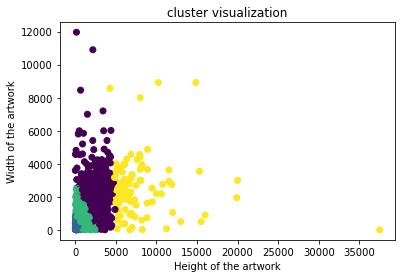

In [38]:
x_axis = x['height']  
y_axis = x['width']  

plt.title("cluster visualization")
plt.xlabel('Height of the artwork')
plt.ylabel('Width of the artwork')

plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()